### Исследование рынка видеоигр

По заказу интернет-магазина "Стримчик" проводится исследование рынка видеоигр для построения прогноза на 2017 год. Для анализа представлены данные до 2016 по продажам, возрастному рейтингу и оценкам критиков и пользователей. 
Необходимо опредлить, какие жанры и платформы сейчас наиболее популярны, а также насколько отличается структура спроса на трёх основных рынках - США, Европа и Япония.


1) <a href='#info1'>Общая информация</a>

- <a href='#info2'>Вывод</a>

2) <a href='#info3'>Предобработка данных</a>

- <a href='#info4'>Вывод</a>

3) <a href='#info5'>Исследовательский анализ данных</a>

- <a href='#info6'>Вывод</a>

4) <a href='#info7'>Характеристика региональных рынков</a>

- <a href='#info8'>Вывод</a>

5) <a href='#info9'>Проверка гипотез</a>

- <a href='#info10'>Вывод</a>    

6) <a href='#info11'>Общий вывод</a>

### 1. Общая информация. <a id = info1> </a>

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
import warnings
warnings.filterwarnings('ignore')

Рассмотрим исходную таблицу **games**.

In [4]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Информация о видеоиграх представлена в таблице из **16715** записей. На первый взгляд мы можем выделить следующие проблемы с данными:
1. пропуски в столбцах **name, Year_of_Release, Genre, Critic_Score, User_Score, Rating**
2. формат float в столбце **Year of release**, который необходимо перевести в int
3. в названиях столбцов присутствует верхний и нижний регистр
4. столбец **user_score** находится в формате object

Перед дальнейшей проверкой произведём замену в названиях столбцов.

In [6]:
#создаём список для замены на основе приведённых к нижнему регистру названий столбцов фрейма
new_name = games.columns.str.lower()
#задаём названия столбцов, исходя из нового списка
games.set_axis(new_name, axis = 'columns', inplace = True)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Мы привели названия колонок к нижнему регистру. Рассмотрим столбцы по-порядку.

1. **name** - название игры

In [7]:
print('Число пропусков:', games['name'].isna().sum())
games[games['name'].isna()]

Число пропусков: 2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы обнаружили 2 игры на платформе Sega Genesis, у которых отсутствуют название и жанр. При этом, одна из них продалась тиражом  в 1.78 млн. копий.
Судя по списку из Википедии,
(https://en.wikipedia.org/wiki/List_of_best-selling_Sega_Genesis_games)
игра в строке с индексом 659 - это, предположительно, Mortal Kombat II.
Данные игры были выпущены в 1993 году на устаревшей на текущий момент платформе. В связи с этим, мы можем **исключить** эти пропуски при дальнейшей обработке.

Мы знаем, что некоторые игры могли быть портированы на разные платформы. Проверим эту гипотезу по одной из наиболее популярных игр последних лет The Elder Scrolls V: Skyrim.

In [8]:
games[games['name'].str.contains('Skyrim', na = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
75,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,5.05,2.79,0.10,0.85,96.0,8.4,M
130,The Elder Scrolls V: Skyrim,PS3,2011.0,Role-Playing,2.55,2.60,0.25,1.00,92.0,6.4,M
313,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,1.16,2.12,0.00,0.60,94.0,8.1,M
1475,The Elder Scrolls V: Skyrim,PS4,2016.0,Role-Playing,0.48,0.59,0.04,0.21,NaN,NaN,NaN
2768,The Elder Scrolls V: Skyrim,XOne,2016.0,Role-Playing,0.41,0.27,0.00,0.07,NaN,NaN,NaN


Как мы видим, одна игра действительно может встречаться в базе несколько раз с серьёзным разбросом по году выпуска. Этот факт одновременно даёт определённые возможности и накладывает ограничения:

- есть возможность заполнить рейтинг, взяв его у игры с аналогичным названием (как правило, при портировании на другую платформу изменения в игре минимальны, поэтому сохраняются все основания для присвоения ей аналогичного рейтинга)
- возможность восстановить оценки по средним для данной игры (для игр, выпускавшихся на несколько платформ)

2. Рассмотрим столбец **platform**. В предварительном анализе не было обранужено пропусков. Однако, возможно, что есть дубликаты.

In [9]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов не обнаружено. Обработка не требуется.
3. Рассмотрим столбец **year_of_release**.
Создадим функцию для рассмотрения столбцов с численными значениями.

In [10]:
def first_glance(column, graph_name):
    print(games[column].describe())
    print()
    print('5% значений столбца',column, 'меньше:', games[column].quantile(0.05))
    print('95% значений столбца',column, 'меньше:', games[column].quantile(0.95))
    print()
    print('Число пропусков:', games[column].isna().sum())
    print()
    games[column].hist(bins = 50)
    plt.title('Распределение значений')
    plt.xlabel(graph_name)
    plt.show()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

5% значений столбца year_of_release меньше: 1996.0
95% значений столбца year_of_release меньше: 2015.0

Число пропусков: 269



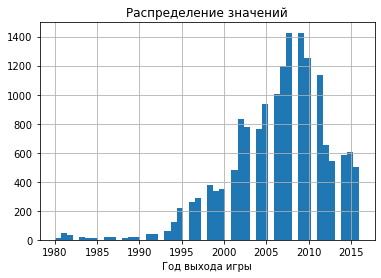

In [11]:
first_glance('year_of_release', 'Год выхода игры')

Наибольшее количество игр в выборке было выпущено в промежутке между 2005 и 2010. Далее количество выпускаемых игр в год демонстрировало тенденцию к снижению. 
Мы видим, что в столбце с годом выпуска пропущено 269 значений. Рассмотрим, на каких платформах их больше всего.

In [12]:
games[games['year_of_release'].isna()]['platform'].value_counts()

Wii     34
PS2     34
DS      30
X360    30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

In [13]:
games[games['year_of_release'].isna()]['name'].value_counts()

LEGO Harry Potter: Years 5-7    7
Happy Feet Two                  4
Rock Band                       4
Test Drive Unlimited 2          3
Bejeweled 3                     3
                               ..
Gun                             1
Call of Duty: Black Ops         1
Transworld Surf                 1
NHL Hitz Pro                    1
Star Trek: Legacy               1
Name: name, Length: 232, dtype: int64

In [14]:
games[(games['year_of_release'].isna() == True) & (games['platform'] == 'PC')]['name'].value_counts()

Call of Duty: Black Ops              1
BioShock 2                           1
Street Fighter IV                    1
GRID                                 1
Dead Island: Riptide                 1
Homeworld Remastered Collection      1
Inversion                            1
Rocksmith                            1
WRC: FIA World Rally Championship    1
Clockwork Empires                    1
TERA                                 1
Battle vs. Chess                     1
Dead Space 3                         1
RollerCoaster Tycoon                 1
Test Drive Unlimited 2               1
LEGO Harry Potter: Years 5-7         1
Tomb Raider (2013)                   1
Name: name, dtype: int64

In [15]:
games[games['name'].str.contains('Chrono Trigger', na = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
687,Chrono Trigger,SNES,1995.0,Role-Playing,0.28,0.00,2.02,0.01,NaN,NaN,NaN
1451,Chrono Trigger,DS,2008.0,Role-Playing,0.61,0.16,0.49,0.08,92.0,8.9,E10+


Мы видим, что большая часть пропусков относится к играм, выходившим на консолях. Поскольку срок "жизни" консоли ограничен, возможно использовать два варианта заполнения:
1. По медианному значению года выхода игр на данной консоли
2. По году выпуска аналогичной игры на других платформах (возможны ошибки в связи с тем, что у некоторых игр разрыв может достигать 13 лет и более)

Для заполнения данных по PC рационально использовать дату выхода на близких по архитектуре консолях - X360, Xone и PS.

4. Рассмотрим столбец **genre** - жанр игры

In [16]:
games['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [17]:
games[games['genre'] == 'Misc'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E
61,Just Dance 3,Wii,2011.0,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+
68,Just Dance 2,Wii,2010.0,Misc,5.80,2.85,0.01,0.78,74.0,7.3,E10+


Мы видим, что больше всего игр представлено в жанрах Action и Sports. Третье место заняла общая группа игр, которые нельзя отнести к классическим жанрам (например, ритм-игры серии Just Dance). 

In [18]:
print('Число пропусков:', games['genre'].isna().sum())

Число пропусков: 2


In [19]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Жанр пропущен в тех же двух строках, что и название игры. Поскольку пропущены сведения по старой платформе с датой выхода 1993, то считаем, что данные две строки можно удалить.

5. Рассмотрим столбец **na_sales** - продажи в млн. копий в Северной Америке

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

5% значений столбца na_sales меньше: 0.0
95% значений столбца na_sales меньше: 1.06

Число пропусков: 0



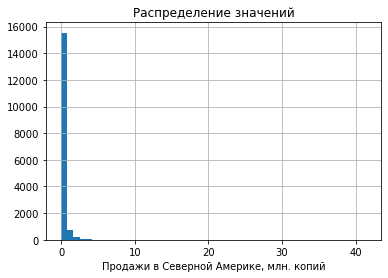

In [20]:
first_glance('na_sales', 'Продажи в Северной Америке, млн. копий')

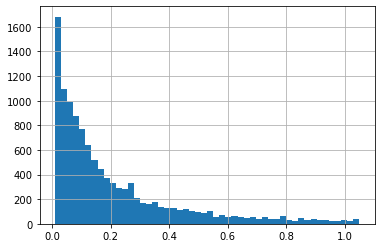

In [21]:
games.query('1.06 > na_sales > 0')['na_sales'].hist(bins = 50)

In [22]:
games[games['na_sales'] == games['na_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Пропущенных значений в столбце нет. Однако есть выброс по продажам в 41.36 млн. копий при 95% значений, находящихся ниже 1.06.
Такие продажи Wii Sports объясняются тем, что консоль Nintendo Wii большей частью продавалась в комплекте с данной игрой.

6. Рассмотрим продажи в европейской зоне - **eu_sales**

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

5% значений столбца eu_sales меньше: 0.0
95% значений столбца eu_sales меньше: 0.62

Число пропусков: 0



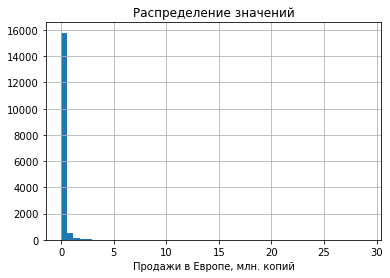

In [23]:
first_glance('eu_sales', 'Продажи в Европе, млн. копий')

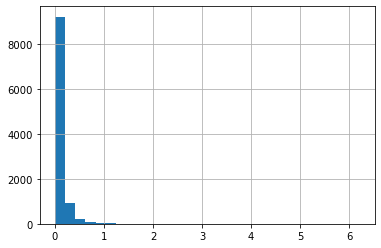

In [24]:
games.query('0.62 > na_sales > 0')['eu_sales'].hist(bins = 30)

In [25]:
games[games['eu_sales'] == games['eu_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Ситуация с Wii Sports повторяется и для продаж в Европе. В целом можно отметить, что игры продаются в данном регионе в меньшем объёме, чем в Северной Америке (среднее количество продаж - 0.14 против 0.26)
Пропусков в столбце не обнаружено.

7. Рассмотрим продажи в Японии - **jp_sales**.

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

5% значений столбца jp_sales меньше: 0.0
95% значений столбца jp_sales меньше: 0.36

Число пропусков: 0



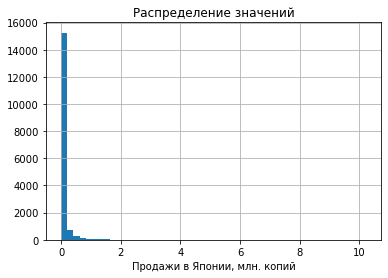

In [26]:
first_glance('jp_sales', 'Продажи в Японии, млн. копий')

In [27]:
games[games['jp_sales'] == games['jp_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN


Пропущенные данные отсутствуют.

В Японии Wii Sports не получила такое же преимущество, как в других регионах. Лидер по продажам по региону - Pokemon Red/Blue - первая игра серии Pokemon.

Среднее количество проданных копий в Японии меньше, чем в Европе и США - 0.07 млн.

8. Исследуем **other_sales** - продажи в иных регионах. 

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

5% значений столбца other_sales меньше: 0.0
95% значений столбца other_sales меньше: 0.2

Число пропусков: 0



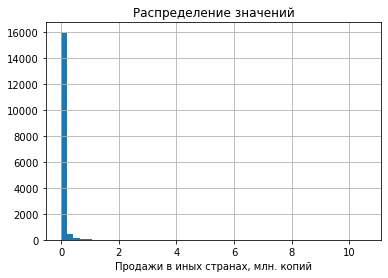

In [28]:
first_glance('other_sales', 'Продажи в иных странах, млн. копий')

In [29]:
games[games['other_sales'] == games['other_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.4,0.41,10.57,95.0,9,M


Рынок за границами основных трёх регионов характеризуется в среднем относительно меньшими объемами продаж (0.04 млн. копий). Также интересно, что лидирует по продажам GTA:San Andreas.
Пропусков в столбце не обнаружено.

9. Рассмотрим оценки критиков - **critic_score**

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

5% значений столбца critic_score меньше: 43.0
95% значений столбца critic_score меньше: 89.0

Число пропусков: 8578



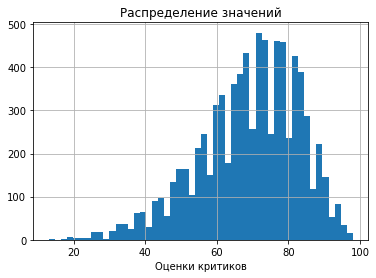

In [30]:
first_glance('critic_score', 'Оценки критиков')

Text(0.5, 1.0, 'Распределение игр без оценок по году выпуска')

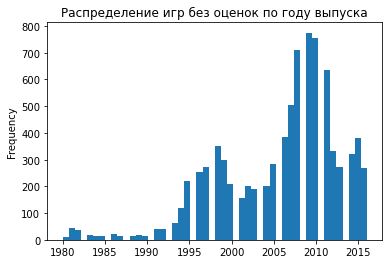

In [31]:
games[games['critic_score'].isna() == True]['year_of_release'].plot(kind = 'hist', bins = 50)
plt.title('Распределение игр без оценок по году выпуска')

Мы видим, что в оценках критиков более 50% пропущенных значений. При этом они не тяготеют к определённому году выпуска. Попробуем определить, у скольких игр с пропусками оценок есть оценки при выходе на других платформах.

In [32]:
missing_rating = games[games['critic_score'].isna() == True]['name'].unique()
full_rating = games[games['critic_score'].isna() == False]
def score_dupl_check(game_name):
    if game_name in missing_rating:
        return 'True'
    else:
        return 'False'
full_rating['has_rating'] = full_rating['name'].apply(score_dupl_check)
full_rating['has_rating'].value_counts()

False    6825
True     1312
Name: has_rating, dtype: int64

Мы видим, что рейтинг у 1312 игр можно восстановить по оценкам, выставляемым игре при выходе на иной платформе. Рассмотрим распределение пропусков по платформам.

In [33]:
games[games['critic_score'].isna() == True]['platform'].value_counts()

DS      1434
PS       997
PS2      863
PSP      747
Wii      735
PS3      511
GBA      384
3DS      352
X360     346
N64      319
PSV      310
PC       259
SNES     239
SAT      173
PS4      140
2600     133
GC       108
XB        99
GB        98
NES       98
XOne      78
WiiU      57
DC        38
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Большинство игр без оценок критиков относится к играм на консоли Nintendo DS. 

Как мы выяснили, часть пропусков возможно заполнить за счет оценок на других платформах. Поскольку в дальнейшем будут анализироваться продажи в зависимости от рейтинга, то, во избежание искажений, отсутствующий рейтинг стоит заменить на 0 и исследовать игры без него.

10. Рассмотрим оценки пользователей - **user_score**. Столбец содержит формат object. Следовательно, в нём присутствуют нечисловые значения. 

In [34]:
print('Число пропусков в столбце "user_score"',games['user_score'].isna().sum())

Число пропусков в столбце "user_score" 6701


In [35]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
0.2       2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Мы видим, что в данном столбце присутствует 2424 значения tbd - это может быть сокращением от 'to be determined', т.е. пользовательский рейтинг по данным играм не был определен. Возможно, что количество оценок было недостаточно. По содержанию данные значения равносильны пропускам, поэтому возможно воспользоваться следующим алгоритмом:

- заменить tbd на NaN
- восстановить часть пропусков по аналогичным играм на других платформах
- заменить пропуски нулевыми или резко отличающимися значениями

11. Рассмотрим последний столбец - рейтинг ESRB **rating** - возрастные ограничения игры.

In [36]:
print('Число пропусков в столбце "rating"',games['rating'].isna().sum())
print(games['rating'].value_counts())

Число пропусков в столбце "rating" 6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


Рейтинг не был присвоен 6766 играм. Возможно, что это игры, которые были произведены не на территории США и не подавались на оценку возрастного рейтинга (например, российская игра Мор.Утопия не имеет официального рейтинга ESRB). Также ассоциация ESRB была основана только в 1994 году и вышедшие до этого периода игры могли не получить рейтинга.
Для восстановления пропусков предлагается использовать следующий алгоритм:

- восстановить рейтинг по другим версиям данной игры (при портировании крайне редко версия меняется настолько, чтобы существенно изменить те факторы, на основании которых выводится рейтинг)
- установить значение not_rated для оставшихся игр

### Вывод <a id = info2></a>

Мы рассмотрели таблицу **games** с информацией о продажах видеоигр. Она состоит из **11** столбцов, и в неё внесено **16715** значений.

В ходе первичного анализа было выявлено следующее. 

#### Отсутствуют ошибки

Столбцы **platform, na_sales, eu_sales, jp_sales, other_sales**

#### Незначительные ошибки

1. Столбец **name** - обнаружено 2 пропуска. Поскольку пропущены названия игр 1993 года выпуска, то представляется возможным удалить данные строки
2. Столбец **genre** - пропуски в тех же двух строках, что и в столбце **name**. Возможно удаление данных строк.

#### Существенные ошибки

Столбец **year_of_release** - год выпуска игры. Обнаружены пропуски в 269 строках. Также столбец содержит значения в формате float, хотя логичнее было бы привести его к формату int.
Восстановление пропусков возможно по медианному году выпуска для консолей и году выпуска на схожих платформах для PC.

#### Критические ошибки

1. Столбец **critic_score** - 8578 пропусков - возможно восстановить 1312 по аналогичным играм на других платформах. Остальные пропуски возможно либо оставить без заполнения, либо заполнить выбивающимся значением, чтобы он не влиял на дальнейшие расчеты.
2. Столбец **user_score** - 6701 пропусков, 2424 значения "tbd" - неопределённый рейтинг. Возможно заменить tbd на NaN, чтобы изменить формат столбца на float. Далее часть рейтингов возможно восстановить по аналогичным играм на других платформах.
3. Столбец **rating** - 6766 пропусков. Пропуски можно объяснить тем, что игра была произведена не на территории США и не подавалась в комиссию для установления возрастного рейтинга. Считаем возможным восстановить рейтинг по аналогичным играм на других платформах, а оставшиеся пропуски заполнить значением "not_rated".

### 2. Предобработка данных <a id = info3></a>

Переходим к предобработке данных. Необходимо подвергнуть обработке следующие столбцы: **name, genre, year_of_release, critic_score, user_score, rating**.

1. Обработка данных с незначительными ошибками.

Поскольку мы определили, что пропуски в значении названий игр и жанров находятся в одних и тех же двух строках, то считаем возможным их отбросить.

In [37]:
games.dropna(subset = ['name'], inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Мы удалили из таблицы 2 значения, относящихся к 1993 году. Теперь пропуски в столбцах **name, genre** отсутствуют.

2. Перейдём к более существенным ошибкам. Рассмотрим столбец **year_of_release**. Как мы выяснили, пропуски распределены по разным платформам. Чтобы не выйти за границы функционирования платформы, используем для всех платформ, кроме PC, заполнение по медианному году выхода игр. PC исключаем из перебора, так как персональные компьютеры при смене поколений графических чипов и операционных систем сохраняли то же самое название платформы, и данные изменения рассматривались как апгрейд.

In [38]:
print('Количество пропусков до обработки:', games['year_of_release'].isna().sum())
#выбираем названия всех игр, где пропущен год
missing_year_platform = games[games['year_of_release'].isna()]['platform'].unique()
#создаём переменную med_year, которая каждой платформе будет ставить в соответствие медианный год выхода
for console in missing_year_platform:
    med_year = round(games.loc[games['platform'] == console, 'year_of_release'].median(), 0)
    print(console, med_year)
    #заменяем пустые значения в ячейках, исключая значения для PC
    games.loc[
        (games['platform'] == console) & (games['year_of_release'].isna()) & (
            games['platform'] != "PC"), 'year_of_release'] = med_year
print('Количество пропусков после обработки:', games['year_of_release'].isna().sum())

Количество пропусков до обработки: 269
PS2 2005.0
Wii 2009.0
2600 1982.0
X360 2010.0
GBA 2003.0
PC 2010.0
PS3 2011.0
PS 1998.0
PSP 2009.0
XB 2004.0
GB 1997.0
DS 2008.0
GC 2003.0
3DS 2013.0
N64 1999.0
PSV 2014.0
Количество пропусков после обработки: 17


In [39]:
games[games['year_of_release'].isna()]['platform'].value_counts()

PC    17
Name: platform, dtype: int64

Мы оставили пропуски только для игр на PC. Заполним их годом выхода аналогичных игр на других платформах. Будем стараться использовать в качестве референса различные версии Xbox как платформы Microsoft (платформа обладает схожей архитектурой с ОС Windows, поэтому порты с неё и на неё часто выходят почти одновременно с PC)

In [40]:
name_missing_pc = games[games['year_of_release'].isna()]['name'].unique()
#print(name_missing_pc)
for name in name_missing_pc:
    #print(games[games['name'] == name]['platform'].value_counts())
    #было выяснено, что почти все эти игры выпускались на X360, поэтому используем эту платформу для референса
    release_year = games.loc[
        (games['name'] == name) &((games['platform'] == 'X360') | (games['platform'] == 'XB')), 'year_of_release'
    ].sum()
    print(name, release_year)
    #заполняем значения
    games.loc[
        (games['name'] == name) & (games['year_of_release'].isna()), 'year_of_release'] = release_year
print()
print('Количество пропусков после обработки:', games['year_of_release'].isna().sum())

Call of Duty: Black Ops 2010.0
TERA 0.0
Tomb Raider (2013) 2013.0
BioShock 2 2010.0
LEGO Harry Potter: Years 5-7 2010.0
Dead Space 3 2013.0
Test Drive Unlimited 2 2010.0
Street Fighter IV 2009.0
Rocksmith 2011.0
Dead Island: Riptide 2013.0
RollerCoaster Tycoon 2003.0
Clockwork Empires 0.0
GRID 2008.0
Battle vs. Chess 2011.0
WRC: FIA World Rally Championship 2010.0
Homeworld Remastered Collection 0.0
Inversion 2012.0

Количество пропусков после обработки: 0


Так как в двух случаях пропуски заполнились нулями (данные игры выходили только на PC), то воспользуемся медианным годом по платформе.

In [41]:
pc_year_med = games[games['platform'] == 'PC']['year_of_release'].median()
games.loc[games['year_of_release'] == 0.0, 'year_of_release'] = pc_year_med

count    16713.000000
mean      2006.475139
std          5.896638
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

5% значений столбца year_of_release меньше: 1996.0
95% значений столбца year_of_release меньше: 2015.0

Число пропусков: 0



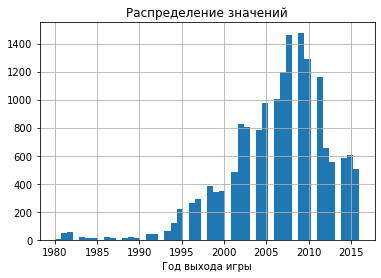

In [42]:
first_glance('year_of_release', 'Год выхода игры')

In [43]:
#меняем формат столбца
games['year_of_release'] = games['year_of_release'].astype('int64')

Мы обработали пропуски в столбце **year_of_release**, поэтому стало возможным перевести его в формат int64. Теперь год представляет собой целое число.

3. Переходим к обработке столбцов с критическими ошибками. Это столбцы **critic_score, user_score, rating**

Попробуем рассмотреть **user_score**. Для начала переведём все значения "tbd" в NaN, чтобы появилась возможность перевести столбец в числовую форму. 

Для этого используем функцию to_numeric, которая при ошибках будет заменять неудобные значения на NaN.

In [44]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [45]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [46]:
print('Количество пропусков в user_score:', games['user_score'].isna().sum())

Количество пропусков в user_score: 9123


Попытаемся восстановить часть пропусков за счет средних оценок данных игр на других платформах.

In [47]:
user_score_pivot = games.pivot_table(index = 'name', values = 'user_score', aggfunc = 'mean')
user_score_pivot.columns = ['user_score_mean']
games = games.merge(right = user_score_pivot, on = 'name', how = 'left')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_mean
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,8.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


In [48]:
games.loc[games['user_score'].isna() == True, 'user_score'] = games['user_score_mean']
print('Количество пропусков в user_score:', games['user_score'].isna().sum())

Количество пропусков в user_score: 8024


Удалось уменьшить число пропущенных значений более, чем на 1000. Однако пропущенные значения сохранились. Поскольку в дальнейшем мы будем исследовать связь продаж и рейтинга, то считаем возможным не заполнять пропуски.

Рассмотрим стобец **critic_score**. Заполним пропуски по тому же алгоритму, что и для user_score.

In [49]:
print('Количество пропусков в critic_score до обработки:', games['critic_score'].isna().sum())
critic_score_pivot = games.pivot_table(index = 'name', values = 'critic_score', aggfunc = 'mean')
critic_score_pivot.columns = ['critic_score_mean']
games = games.merge(right = critic_score_pivot, on = 'name', how = 'left')
games.loc[games['critic_score'].isna() == True, 'critic_score'] = games['critic_score_mean']
print('Количество пропусков в critic_score после обработки:', games['critic_score'].isna().sum())

Количество пропусков в critic_score до обработки: 8576
Количество пропусков в critic_score после обработки: 7615


Также удалось убрать около 1000 пропусков. По аналогичной с **user_score** причине оставляем пропуски незаполненными.

Переходим к возрастному рейтингу - **rating**. Заполним часть рейтинга имеющимися значениями с других платформ, а в остальных случаях укажем значение Not_rated.

In [50]:
games_rated = games[games['rating'].isna()== False].groupby('name')['rating'].apply(lambda x: x.mode().iloc[0])
games_rated = games_rated.reset_index()
games_rated.columns = ['game_name', 'rating_esrb']
games_rated.head()

,game_name,rating_esrb
0,Tales of Xillia 2,T
1,.hack//Infection Part 1,T
2,.hack//Mutation Part 2,T
3,.hack//Outbreak Part 3,T
4,007 Racing,T


In [51]:
games = games.merge(games_rated, left_on = 'name', right_on = 'game_name', how = 'left')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_mean,critic_score_mean,game_name,rating_esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,8.0,76.0,Wii Sports,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,82.0,Mario Kart Wii,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0,80.0,Wii Sports Resort,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
print('Количество пропусков в rating до обработки:', games['rating'].isna().sum())
games.loc[games['rating'].isna() == True, 'rating'] = games['rating_esrb']
print('Количество пропусков в rating после обработки:', games['rating'].isna().sum())

Количество пропусков в rating до обработки: 6764
Количество пропусков в rating после обработки: 6327


Как мы видим, пропуски удалось заполнить только частично. Используем для заполнения оставшихся "Not_rated".

In [53]:
games['rating'] = games['rating'].fillna('Not_rated')
print('Количество пропусков в rating после обработки:', games['rating'].isna().sum())

Количество пропусков в rating после обработки: 0


### Вывод <a id = info4></a>

В ходе предобработки данных было сделано следующее:

1. Отброшены 2 строки с отсутствующими именами и жанрами игры
2. Заполнены года выпуска игр **year_of_release** медианными значениями выпуска игр на соответствующей платформе (в случае PC - годами выпуска игр на Xbox). Столбец приведён к формату int.
3. Заполнены частично пропуски в пользовательском рейтинге и рейтинге критиков (использовались средние оценки по игре на разных платформах). Пользовательский рейтинг приведён к формату float.
4. Частично заполнены пропуски в возрастном рейтинге, оставшиеся значения заменены на "Not_rated".

### 3. Исследовательский анализ <a id = info5> </a>

Перед проведением анализа данных удалим из таблицы лишние столбцы, которые были добавлены туда в ходе восстановления пропусков. Также добавим столбец **world_sales**, содержащий общую информацию о продажах игры.

In [54]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16713 non-null  object 
 1   platform           16713 non-null  object 
 2   year_of_release    16713 non-null  int64  
 3   genre              16713 non-null  object 
 4   na_sales           16713 non-null  float64
 5   eu_sales           16713 non-null  float64
 6   jp_sales           16713 non-null  float64
 7   other_sales        16713 non-null  float64
 8   critic_score       9098 non-null   float64
 9   user_score         8689 non-null   float64
 10  rating             16713 non-null  object 
 11  user_score_mean    8689 non-null   float64
 12  critic_score_mean  9098 non-null   float64
 13  game_name          10386 non-null  object 
 14  rating_esrb        10386 non-null  object 
dtypes: float64(8), int64(1), object(6)
memory usage: 2.7+ MB


In [55]:
games = games.drop(columns = ['user_score_mean', 'critic_score_mean', 'game_name', 'rating_esrb'])

In [56]:
games['world_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

1. При первоначальной характеристике датафрейма мы рассмотрели распределение игр в базе данных по годам выпуска. Исследуем данные подробнее.

count    16713.000000
mean      2006.475139
std          5.896638
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


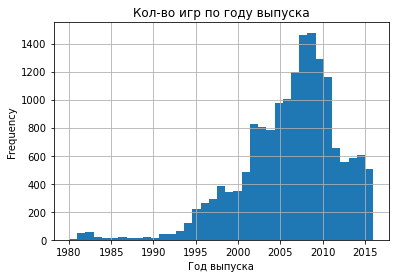

2009    1477
2008    1458
2010    1293
2007    1197
2011    1163
2006    1006
2005     973
2002     829
2003     801
2004     783
Name: year_of_release, dtype: int64

In [57]:
print(games['year_of_release'].describe())
#строим гистограмму, используя в качестве кол-ва корзин - кол-во уникальных значений года
result = games['year_of_release'].plot(kind = 'hist', bins = len(games['year_of_release'].unique()), grid = True)
#plt.xticks(years)
plt.title('Кол-во игр по году выпуска')
plt.xlabel('Год выпуска')
plt.show()

games['year_of_release'].value_counts().head(10)

Мы видим, что максимальное количество игр выпускалось в промежутке с 2005 по 2011, далее количество игр в год довольно резко снизилось. Одна из возможных причин этого - удлинение цикла разработки. 
Пик выпуска игр был зафиксирован в 2009 году - 1477. Схожее количество - в 2008 - 1458.

2. Попробуем проанализировать количество выпущенных игр на различных платформах по годам. Для начала выберем топ-10 платформ по продажам.

In [58]:
max_sales = games.pivot_table(index = 'platform', values = 'world_sales', aggfunc = 'sum').sort_values(
    'world_sales', ascending = False)
max_sales.head(10)


,world_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Мы видим, что абсолютным лидером по продажам является PS2, на втором месте X-box 360, на третьем - PS3. Персональные компьютеры замыкают десятку с результатом почти в 5 раза ниже, чем у первого места.
Исследуем, как менялись продажи по популярным платформам с течением времени.

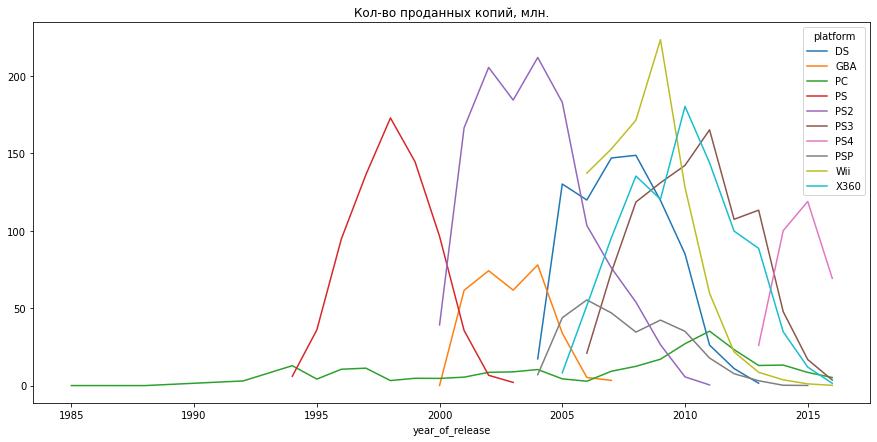

In [59]:
#создаём список из топ-10 платформ
top_platforms = max_sales.head(10).index.values.tolist()
#используя список как ограничитель для выборки, строим сводную таблицу по продажам
sales_year_platf = (games
                    .query('platform in @top_platforms')
                    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'world_sales', aggfunc = 'sum')
                    .plot(figsize = (15, 7))
                   )
plt.title('Кол-во проданных копий, млн.')
plt.show()

Мы видим, что развитие консолей подвержено следующему циклу:

- появление на рынке
- резкий рост продаж
- выход на пиковое значение
- постепенный спад продаж
- выход консоли из обращения

Единственное исключение - PC - персональные компьютеры, где рынок отличается относительно низкими средними продажами, однако из обращения платформа не выходит. Это связано с тем, что PC, в первую очередь, является рабочим инструментом и его функция как игровой платформы зачастую вторична (особенно на территории Северной Америки и Японии).

По графику можно предположить, что цикл платформа проходит примерно за 10 лет. Попробуем точнее определить "срок жизни" консольной платформы. Установим лимит на уровне 10 млн. копий и рассмотрим те периоды, когда продажи уходили ниже и выше данного лимита.

In [60]:
threshold = 10
#создаём группировку по платформе и году выпуска игры. Затем убираем из выборки все продажи ниже 10 млн
# следом сбрасываем индекс, чтобы использовать его для дальнейших группировок
existing_sales = (games
                  .groupby(['platform', 'year_of_release'])
                  .agg({'world_sales' : 'sum'})
                  .query('world_sales >= @threshold')
                  .reset_index())
#existing_sales.head()
#считаем, сколько строк в таблице получилось для каждой из платформ и выводим медиану из этого значения
# этот показатель и будет считаться сроком жизни платформы
counting_years = existing_sales.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'count')
lifetime = counting_years['year_of_release'].median()
print('Средняя продолжительность срока жизни платформы при лимите продаж в'
      , threshold
      , 'млн. копий составила: {:.0f} лет'.format(lifetime))

Средняя продолжительность срока жизни платформы при лимите продаж в 10 млн. копий составила: 6 лет


Мы видим, что срок жизни платформы в среднем составляет **6** лет. Используем данную величину, чтобы задать промежуток времени для исследования. Это позволит определить наиболее актуальные на текущий момент платформы.

Актуальный период исследования: 2010 - 2016


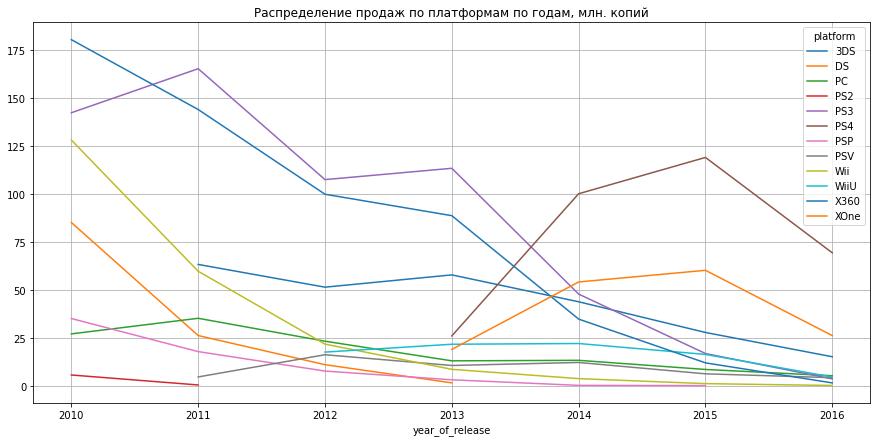

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010,NaN,85.02,27.04,5.64,142.17,NaN,35.04,NaN,127.95,NaN,180.21,NaN
2011,63.20,26.18,35.16,0.45,165.09,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.23,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,57.76,1.54,13.01,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [61]:
year_max = games['year_of_release'].max()
year_min = int(year_max - lifetime)
print('Актуальный период исследования:', year_min, '-', year_max)
#делаем выборку по релевантным годам, которую будем использовать в дальнейших расчетах
games_relevant = games.query('@year_min <= year_of_release <= @year_max')
games_relevant_pivot = games_relevant.pivot_table(index = 'year_of_release'
                                                  , columns = 'platform'
                                                  , values = 'world_sales'
                                                  , aggfunc = 'sum')
games_relevant_pivot.plot(grid = True, figsize = (15, 7))
plt.title('Распределение продаж по платформам по годам, млн. копий')
plt.show()

games_relevant_pivot

Мы видим, что в 2016 наблюдается снижение продаж по всем основным платформам. Это связано с неполнотой данных по данному году. Рассмотрим промежуток 2010 - 2015.

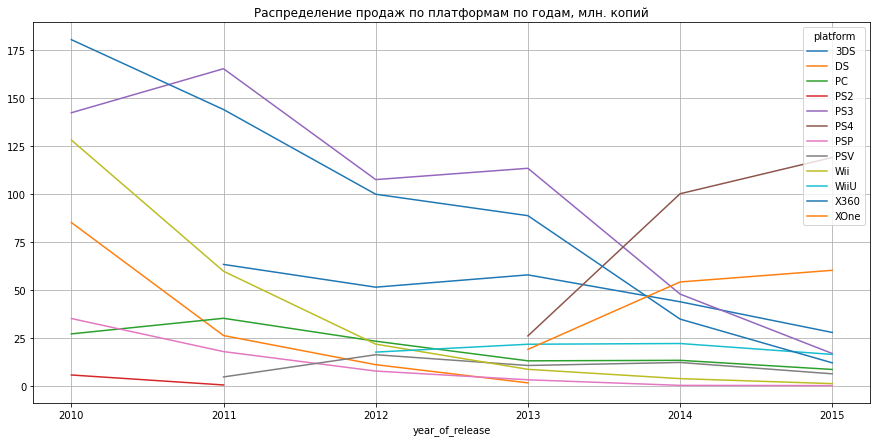

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010,NaN,85.02,27.04,5.64,142.17,NaN,35.04,NaN,127.95,NaN,180.21,NaN
2011,63.20,26.18,35.16,0.45,165.09,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.23,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,57.76,1.54,13.01,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


In [62]:
games_relevant2 = games.query('@year_min <= year_of_release <= @year_max-1')
games_relevant2_pivot = games_relevant2.pivot_table(index = 'year_of_release'
                                                  , columns = 'platform'
                                                  , values = 'world_sales'
                                                  , aggfunc = 'sum')
games_relevant2_pivot.plot(grid = True, figsize = (15, 7))
plt.title('Распределение продаж по платформам по годам, млн. копий')
plt.show()

games_relevant2_pivot

Мы видим, что за последние годы на первый план выходят платформы XOne и PS4 - они единственные демонстрируют положительную динамику. Среди портативных консолей лидирует Nintendo 3DS, однако консоль уже перешла уровень пика продаж и входит в нисходящую стадию жизненного цикла.
Мы также видим, что жизненный цикл завершается для консолей PS3, PS Vita, X360. Wii U демонстрировала неплохие продажи в 2015, однако показатель 2016 (даже с учетом неполноты данных) со снижением в 4 раза по сравнению с 2015 позволяет предположить, что популярность данной консоли в 2017 также снизится.

С точки зрения продаж в 2017 году лучше сосредоточиться на следующих консолях:
- XOne
- PS4

Можно также обратить внимание на **Nintendo 3DS**, однако продажи по ней могут быть ниже, чем в предыдущем году. 

3. Рассмотрим разброс по продажам в зависимости от платформы. Исследования будем проводить на промежутке 2010-2016.

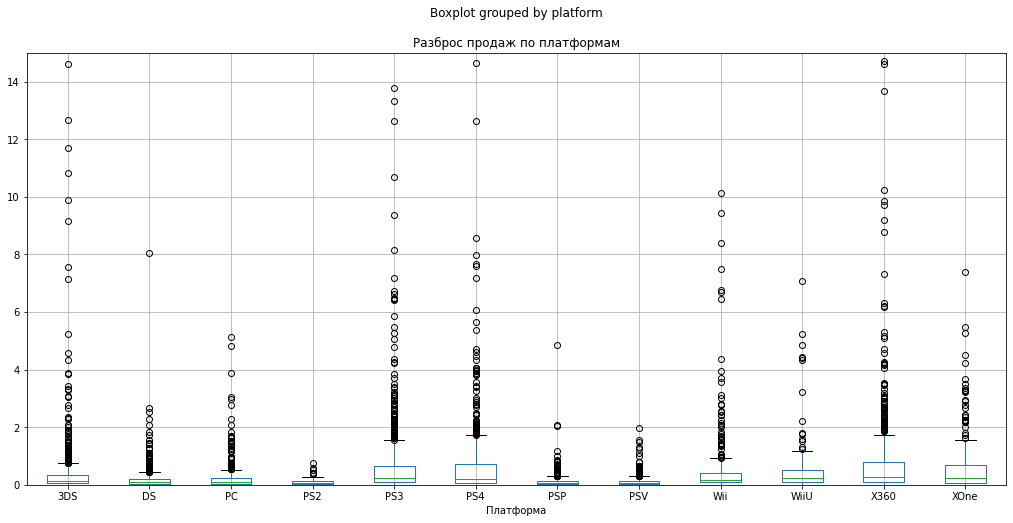

In [63]:
games_relevant.boxplot(column = 'world_sales', by = 'platform', figsize = (17, 8))
plt.xlabel('Платформа')
plt.ylim(0,15)
plt.title('Разброс продаж по платформам')
plt.show()

По "ящикам с усами" мы видим, что для большинства платформ характерно распределение, скошенное вправо. Для наиболее популярных платформ (PS3, PS4, X360, XOne, 3DS) также характерно наличие большого числа выбросов. Похоже, что продажи некоторых игр существенно превышали средние продажи по платформе. Попробуем вывести топ 10 игр на каждой из платформ.

In [64]:
#создаём функцию для вывода на экран топ-10 игр по продажам на платформе
#функция принимает 2 аргумента - имя фрейма и название платформы
def top_ten(frame, platform_name):
    platform_name = platform_name
    #отбор топ- 10 игр на платформе
    result = frame.query('platform == @platform_name').sort_values(by = 'world_sales', ascending = False).head(10)
    print('Топ-10 игр по продажам на платформе', platform_name)
    print(result[['name','world_sales']])
    #строим диаграмму на основе продаж отобранных 10 игр
    result.plot(x='name', y = 'world_sales', kind = 'bar', figsize = (15, 6))
    plt.title(platform_name)
    plt.xlabel('Топ-10 игр по продажам')
    #прямая горизонтальная линия на уровне медианы по продажам
    #plt.axhline(frame.query('platform == @platform_name')['world_sales'].median(),linestyle = 'dashed', color = 'black')
    #plt.text(
     #   0, frame.query('platform == @platform_name')['world_sales'].median()*2, 'Медианные продажи {:.2f}'.format(
      #  frame.query('platform == @platform_name')['world_sales'].median())
       #     )
    #прямая горизонтальная линия на уровне квонтиля 75%
    q3 = frame.query('platform == @platform_name')['world_sales'].quantile(0.75)
    plt.axhline(q3,linestyle = 'dashed', color = 'black')
    plt.text(
        0, q3*2, 'Продажи 75% игр {:.2f}'.format(
        q3)
    )
    plt.show()

Топ-10 игр по продажам на платформе PS3
                               name  world_sales
16               Grand Theft Auto V        21.05
34       Call of Duty: Black Ops II        13.79
37   Call of Duty: Modern Warfare 3        13.33
41          Call of Duty: Black Ops        12.63
54                   Gran Turismo 5        10.70
69             Call of Duty: Ghosts         9.36
81                   FIFA Soccer 13         8.17
104                   Battlefield 3         7.17
118  Uncharted 3: Drake's Deception         6.74
122                         FIFA 12         6.64


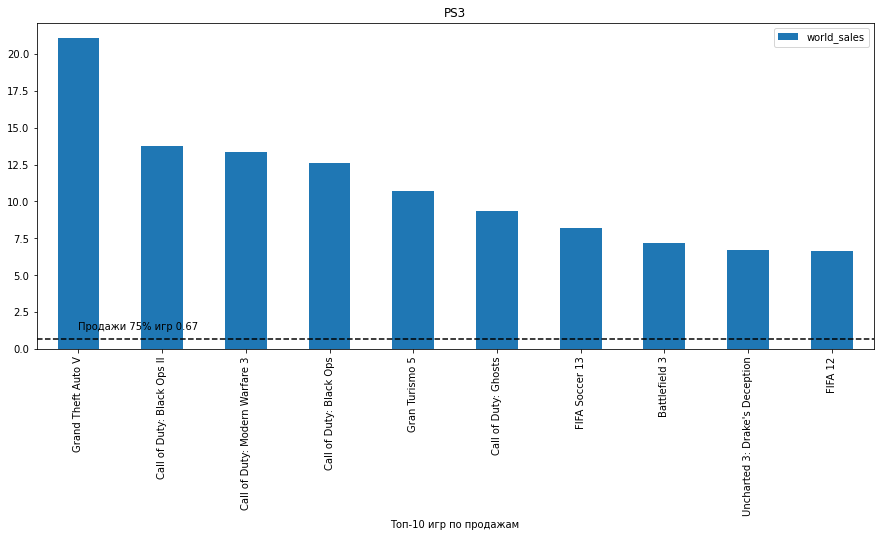


Топ-10 игр по продажам на платформе PS4
                               name  world_sales
31        Call of Duty: Black Ops 3        14.63
42               Grand Theft Auto V        12.62
77                          FIFA 16         8.58
87     Star Wars Battlefront (2015)         7.98
92   Call of Duty: Advanced Warfare         7.66
94                          FIFA 17         7.60
105                       Fallout 4         7.17
143                         FIFA 15         6.08
154                         Destiny         5.64
171      Uncharted 4: A Thief's End         5.39


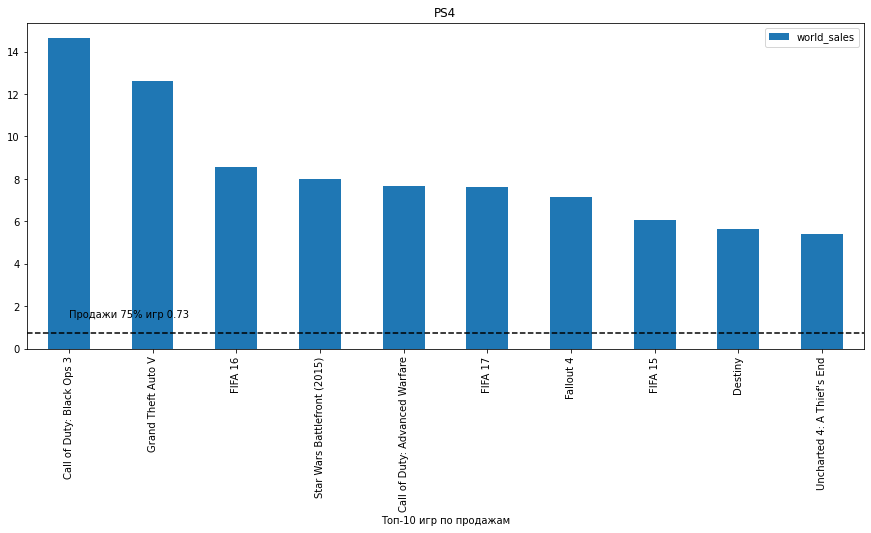


Топ-10 игр по продажам на платформе X360
                              name  world_sales
14              Kinect Adventures!        21.82
23              Grand Theft Auto V        16.27
29  Call of Duty: Modern Warfare 3        14.73
32         Call of Duty: Black Ops        14.62
35      Call of Duty: Black Ops II        13.68
60            Call of Duty: Ghosts        10.24
64                     Halo: Reach         9.86
66                          Halo 4         9.71
72                       Minecraft         9.18
75     The Elder Scrolls V: Skyrim         8.79


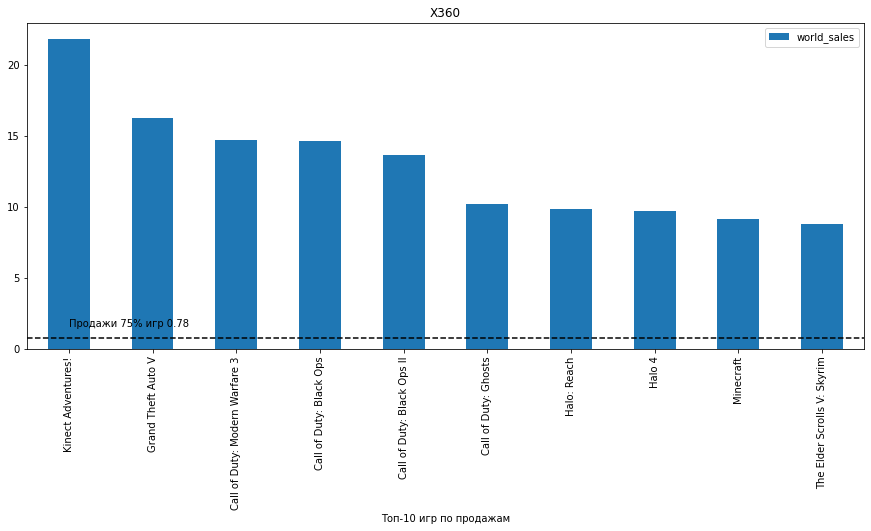


Топ-10 игр по продажам на платформе XOne
                               name  world_sales
99        Call of Duty: Black Ops 3         7.39
165              Grand Theft Auto V         5.47
179  Call of Duty: Advanced Warfare         5.26
242               Halo 5: Guardians         4.49
270                       Fallout 4         4.22
342    Star Wars Battlefront (2015)         3.66
373         Assassin's Creed: Unity         3.50
398                         Destiny         3.37
413  Gears of War: Ultimate Edition         3.28
417                         FIFA 16         3.25


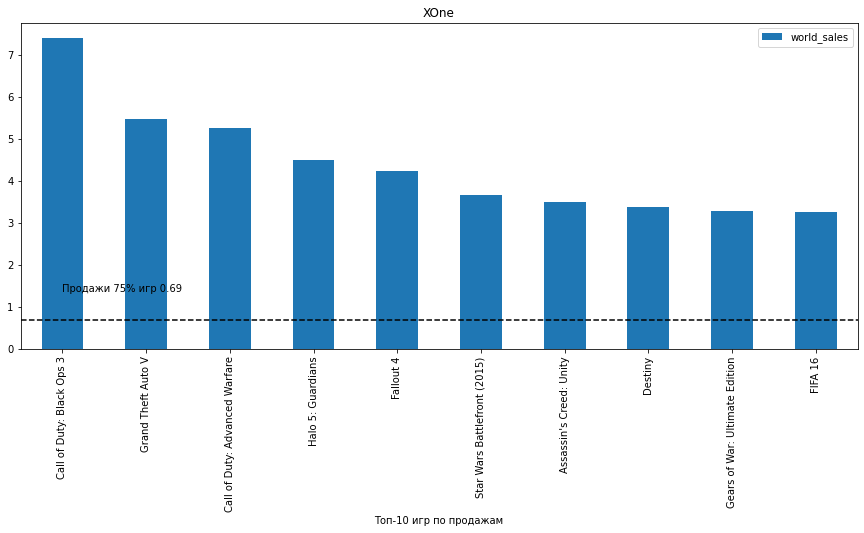


Топ-10 игр по продажам на платформе 3DS
                                          name  world_sales
33                         Pokemon X/Pokemon Y        14.60
40                                Mario Kart 7        12.65
47   Pokemon Omega Ruby/Pokemon Alpha Sapphire        11.68
53                         Super Mario 3D Land        10.81
62                     New Super Mario Bros. 2         9.90
73                   Animal Crossing: New Leaf         9.17
96         Super Smash Bros. for Wii U and 3DS         7.55
108                           Pokemon Sun/Moon         7.14
184                             Tomodachi Life         5.22
235                 Luigi's Mansion: Dark Moon         4.59


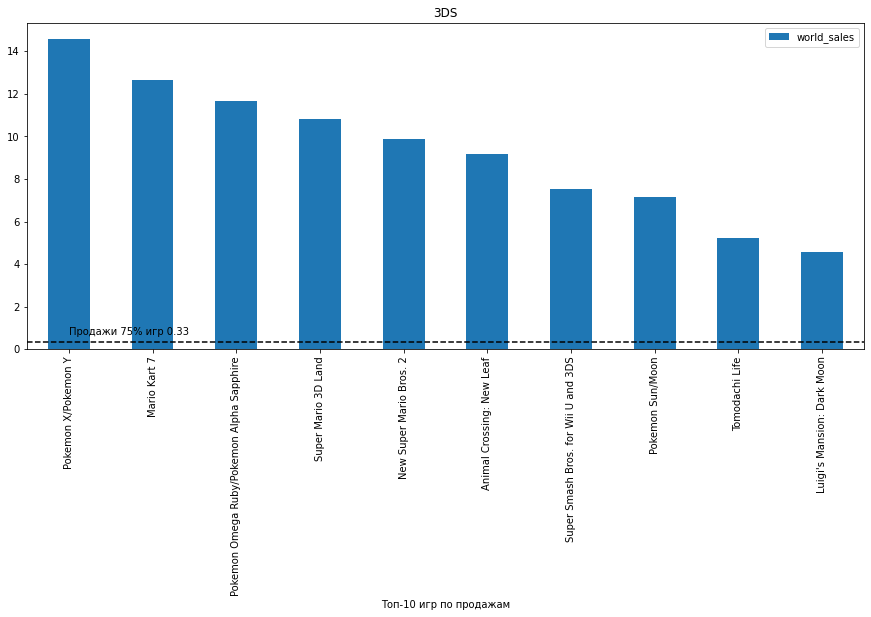

In [65]:
plat_list = ['PS3', 'PS4', 'X360', 'XOne', '3DS']
for plat in plat_list:
    top_ten(games_relevant, plat)
    print()

На основных домашних платформах мы видим доминирование серий Call of Duty и GTA V, которые продались существенно большим числом копий, чем основная масса игр на платформах. Xbox 360 выделяется наличием в топе Kinect Adventures - игры для Xbox Kinect, поставлявшейся в комплекте с камерой для продвижения технологии.

3DS как портативная платформа характеризуется совершенно иным набором игр в топе - серии Pokemon и Mario - монопольные серии Nintendo.

По разнице в уровне продаж 75% игр и продаж среди топовых игр: 0.67 против 21.05 на PS3 или 0.33 против 14.6 на 3DS - мы видим следующее:

- большинство игр продаётся относительно небольшим тиражом
- крупные AAA-проекты очень сильно перетягивают рынок на себя.

4. Влияние оценок пользователей и критиков на продажи.
Исследуем, насколько оценки влияют на количество реализованных копий игры. Может ли рейтинг повлиять на решение о покупке.
Проверим это на тех же 5 платформах. 

In [66]:
def rating_sales(frame, platform): #задаём функцию для построения диаграм рассеяния в зависимости от платформы
    platform_name = platform
    #формируем выборку по платформе
    result = frame.query('platform == @platform_name')[['critic_score', 'user_score', 'world_sales']]
    #задаём лимиты по платформам для того, чтобы отсечь выбросы
    q1 = result['world_sales'].quantile(0.25)
    q3 =  result['world_sales'].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q3 - 1.5*iqr
    result_limited = result.query('@lower_limit <= world_sales <= @upper_limit')
    print('Оценка для платформы:',platform)
    #выводим корреляцию для показателей в таблице
    display(result_limited.corr())
    #строим диаграммы рассеяния по парам продажи-оценки критиков и продажи - оценки пользователей
    result_limited.plot(kind = 'scatter', x = 'critic_score', y = 'world_sales')
    plt.title('Взаимосвязь продаж и оценок профессиональных критиков')
    plt.xlabel('Оценки')
    plt.ylabel('Продажи, млн. копий')
    plt.show()
    result_limited.plot(kind = 'scatter', x = 'user_score', y = 'world_sales')
    plt.title('Взаимосвязь продаж и оценок пользователей')
    plt.xlabel('Оценки')
    plt.ylabel('Продажи, млн. копий')
    plt.show()

Оценка для платформы: PS3


,critic_score,user_score,world_sales
critic_score,1.000000,0.491651,0.452074
user_score,0.491651,1.000000,0.192620
world_sales,0.452074,0.192620,1.000000


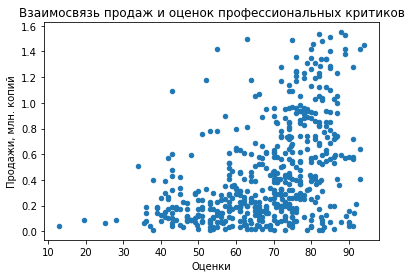

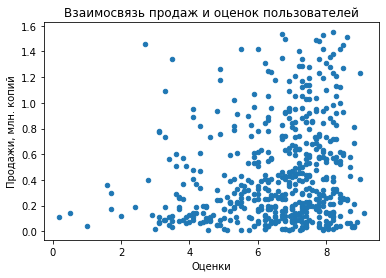


Оценка для платформы: PS4


,critic_score,user_score,world_sales
critic_score,1.000000,0.637595,0.295992
user_score,0.637595,1.000000,0.066650
world_sales,0.295992,0.066650,1.000000


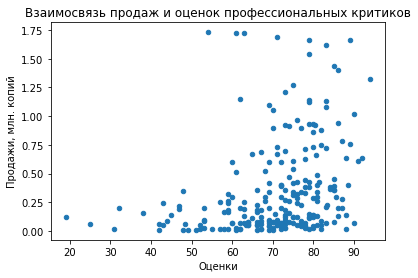

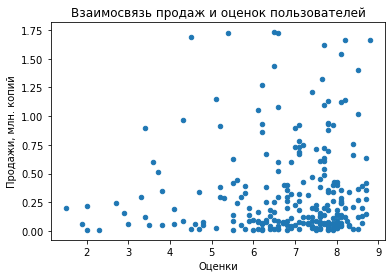


Оценка для платформы: X360


,critic_score,user_score,world_sales
critic_score,1.000000,0.480502,0.426044
user_score,0.480502,1.000000,0.167775
world_sales,0.426044,0.167775,1.000000


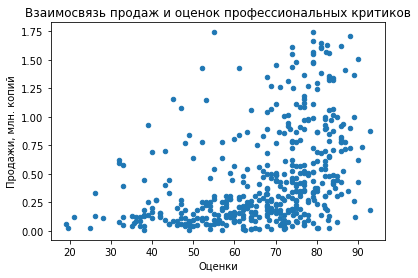

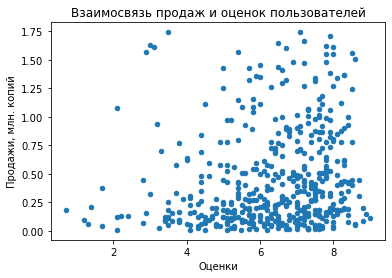


Оценка для платформы: XOne


,critic_score,user_score,world_sales
critic_score,1.000000,0.526014,0.372695
user_score,0.526014,1.000000,0.025170
world_sales,0.372695,0.025170,1.000000


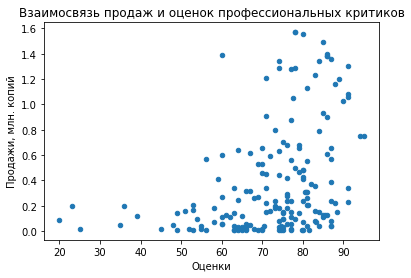

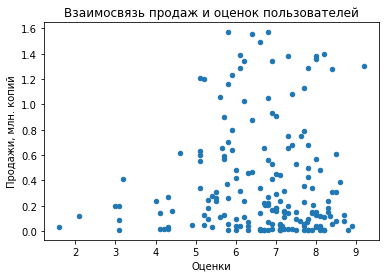


Оценка для платформы: 3DS


,critic_score,user_score,world_sales
critic_score,1.000000,0.549801,0.266469
user_score,0.549801,1.000000,0.061079
world_sales,0.266469,0.061079,1.000000


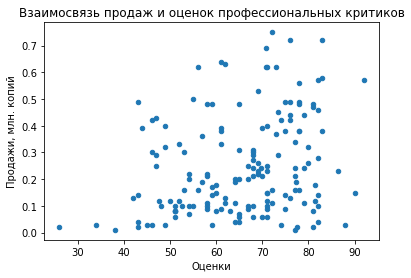

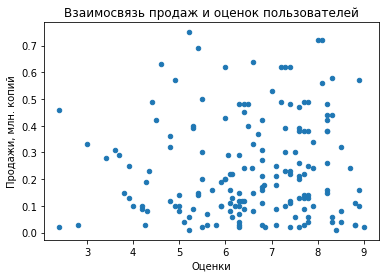

In [67]:
plat_list = ['PS3', 'PS4', 'X360', 'XOne', '3DS']
for plat in plat_list:
    rating_sales(games_relevant, plat)
    print()

Мы провели проверку взаимосвязи оценок и продаж на 5 платформах. При этом рассматривали продажи без выбросов (в основном, ААА-игр, которые приобретут вне зависимости от оценок). 
Оценка корреляции показала следующее:

- больше всего взаимосвязь оценок критиков и продаж видна на платформе PS3 (0.45), на втором месте - X360 (0.43)
- можно сказать, что оценки пользователей на продажи не влияют (коэффициент корреляции не превышает 0.2)
- меньше всего зависят от оценок продажи на 3DS (0.27 и 0.06)

В целом можно заключить, что покупатели достаточно сильно ориентируются на мнение критиков и практически игнорируют мнения других пользователей.

5. Исследование популярности жанров.
Рассмотрим, как распределяются продажи игр по жанрам.

,world_sales
genre,
Action,681.00
Shooter,483.24
Sports,330.69
Role-Playing,316.05
Misc,239.24


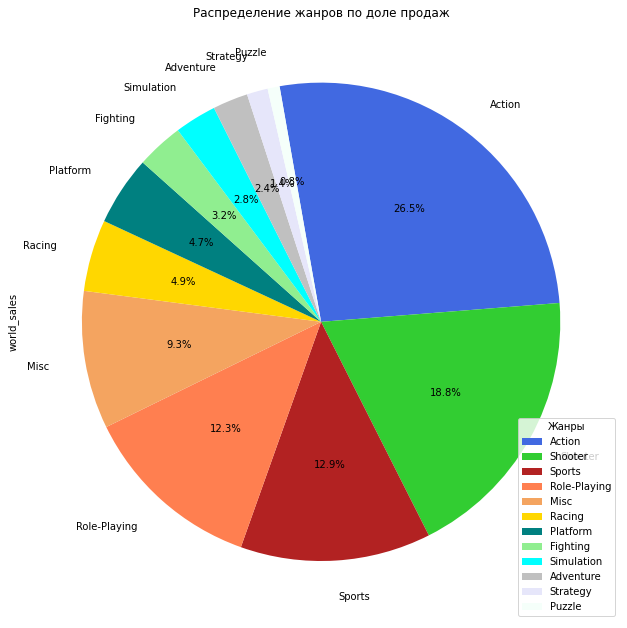

In [68]:
#для построения диаграммы формируем сводную таблицу и сортируем по убыванию
genre_sales = games_relevant.pivot_table(index = 'genre', values = 'world_sales', aggfunc = 'sum').sort_values(
    'world_sales', ascending = False)
color_list = ['royalblue','limegreen','firebrick', 'coral', 'sandybrown', 'gold', 'teal'
             , 'lightgreen', 'aqua', 'silver','lavender', 'mintcream']
#создаём круговую диаграмму с указанием доли каждого сектора
display(genre_sales.head())
genre_sales.plot(
    kind = 'pie', y = 'world_sales', figsize = (11,11)
    , startangle=100, autopct='%1.1f%%', counterclock = False, colors = color_list, labeldistance = 1.15)
plt.legend(title = 'Жанры', loc = 4)
plt.title('Распределение жанров по доле продаж')
plt.show()


Мы видим, что наиболее число игр продавалось в жанрах **Action, Shooter, Sports, Role-Playing**. При этом на **action** приходится более четверти продаж. Можно заметить, что в топе находятся жанры, предполагающие высокую динамику игрового процесса и более подходящие для игры на консолях.

Жанры-аутсайдеры рейтинга - **Puzzle, Strategy, Adventure** - традиционные жанры PC. Рассмотрим распределение на этой платформе, чтобы увидеть, насколько оно отличается от общего.

,world_sales
genre,
Role-Playing,28.92
Shooter,26.84
Action,22.49
Strategy,17.43
Simulation,15.59


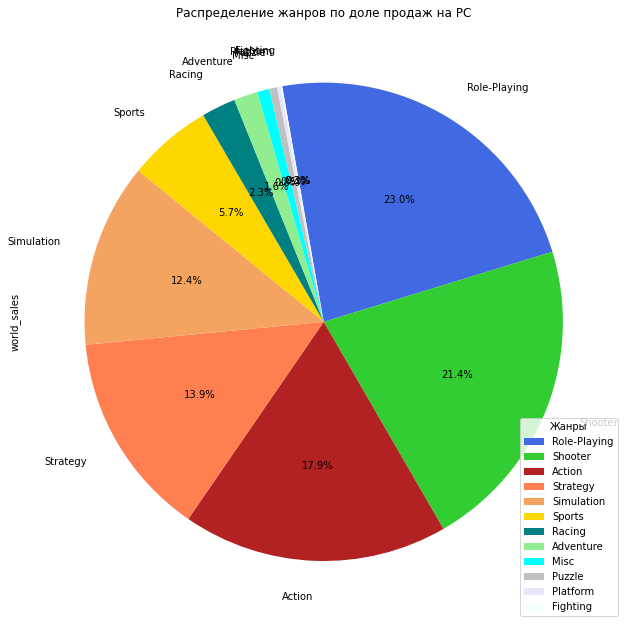

In [69]:
#для построения диаграммы формируем сводную таблицу и сортируем по убыванию
genre_sales = (games_relevant
               .query('platform == "PC"')
               .pivot_table(index = 'genre', values = 'world_sales', aggfunc = 'sum')
               .sort_values(
    'world_sales', ascending = False)
              )
color_list = ['royalblue','limegreen','firebrick', 'coral', 'sandybrown', 'gold', 'teal'
             , 'lightgreen', 'aqua', 'silver','lavender', 'mintcream']
#создаём круговую диаграмму с указанием доли каждого сектора
display(genre_sales.head())
genre_sales.plot(
    kind = 'pie', y = 'world_sales', figsize = (11,11)
    , startangle=100, autopct='%1.1f%%', counterclock = False, colors = color_list, labeldistance = 1.15)
plt.legend(title = 'Жанры', loc = 4)
plt.title('Распределение жанров по доле продаж на PC')
plt.show()

PC заметно отличается от преимущественно консольного общего рынка:

- лидирующую позицию занимают ролевые игры (23%)
- на 3 место по продажам выходят стратегии (13,9%)
- спортивные игры занимают всего 5,7% продаж
- довольно высока доля симуляторов на рынке (12,4%)
- adventure и puzzle, тем не менее, остаются непопулярными)

### Вывод <a id=info6></a>

Мы рассмотрели общие характеристики рынка видеоигр. В ходе исследования было выявлено следующее:
1) Наибольшее число игр выходило в промежутке 2005-2011
2) Средний срок жизни игровой консоли составляет около 6 лет
3) На текущий момент мы находимся в состоянии смены лидирующих консолей: вместо PS3 и X360 приходят PS4 и XOne. Еще сохраняет позиции Nintendo 3DS, однако данная консоль уже прошла пик продаж и двигается к завершению жизненного цикла.
4) На продажи довольно заметно влияют оценки критиков, однако это не касается AAA-игр. Оценки пользователей на продажи влияния практически не оказывают.
5) Наиболее популярными являются следующие жанры: action, sports и shooter. Наименее популярными - Puzzle, Strategy, Adventure. На PC, однако, стоит обратить внимание на rpg, action,  strategy и shooter.

### 4. Характеристика региональных рынков <a id=info7></a>

Рассмотрим характеристики продаж в 3 основных регионах:

- Северная Америка
- Япония
- Европа

Мы будем исследовать следующие параметры: 

- наиболее популярные жанры
- наиболее распространённые платформы
- влияние возрастного рейтинга на продажи

In [70]:
#создадим функцию для представления информации по рынку региона. Функция принимает название фрейма, столбец и название 
# региона для подписи
def market_display(frame, column, country_name):
    print('Топ-5 популярных игр в регионе', country_name)
    # выводим топ-5 игр по суммарному объему продаж
    display(frame
            .pivot_table(index = 'name', values = column, aggfunc = 'sum')
            .sort_values(by = column, ascending = False).head())
    
    print()
    print('Топ-5 популярных жанров в регионе', country_name)
    # выводим топ-5 по суммарному объему продаж в группировке по жанру
    genre_sales = (frame
               .pivot_table(index = 'genre', values = column, aggfunc = 'sum')
               .sort_values(
    column, ascending = False)
              )
    color_list = ['royalblue','limegreen','firebrick', 'coral', 'sandybrown', 'gold', 'teal'
             , 'lightgreen', 'aqua', 'silver','lavender', 'mintcream']
    #создаём круговую диаграмму с указанием доли каждого сектора
    display(genre_sales.head())
    genre_sales.plot(kind = 'pie'
                     , y = column, figsize = (11,11)
                     , startangle=100, autopct='%1.1f%%', counterclock = False
                     , colors = color_list, labeldistance = 1.15)
    plt.legend(title = 'Жанры', loc = 4)
    plt.title('Распределение жанров по доле продаж в регионе')
    plt.show()
    
    print()
    print('Топ-5 популярных консолей в регионе', country_name)
    # выводим топ-5 по суммарному объему продаж в группировке по консоли
    console_sales = (frame
               .pivot_table(index = 'platform', values = column, aggfunc = 'sum')
               .sort_values(column, ascending = False))
    display(console_sales.head())
    console_sales.plot(kind = 'pie', y = column, figsize = (11,11)
                       , startangle=100, autopct='%1.1f%%', counterclock = False, colors = color_list
                       , labeldistance = 1.15)
    plt.legend(title = 'Платформы', loc = 4)
    plt.title('Распределение игровых платформ по доле продаж в регионе')
    plt.show()
    
    print()
    # выведем распределение по продажам в зависимости от рейтинга ESRB
    print('Продажи игр в зависимости от рейтинга в регионе', country_name)
    rating_sales = (frame
               .pivot_table(index = 'rating', values = column, aggfunc = 'sum')
               .sort_values(column, ascending = False))
    display(rating_sales.head())
    rating_sales.plot(kind = 'pie', y = column, figsize = (11,11)
                       , startangle=100, autopct='%1.1f%%', counterclock = False, colors = color_list
                       , labeldistance = 1.15)
    plt.legend(title = 'Возрастной рейтинг', loc = 4)
    plt.title('Распределение продаж по возрастному рейтингу')
    plt.show()

После формирования функции применим её для анализа основных регионов.

Топ-5 популярных игр в регионе Северная Америка


,na_sales
name,
Grand Theft Auto V,23.84
Call of Duty: Black Ops,17.57
Call of Duty: Modern Warfare 3,15.54
Kinect Adventures!,15.00
Call of Duty: Ghosts,14.94



Топ-5 популярных жанров в регионе Северная Америка


,na_sales
genre,
Action,294.06
Shooter,239.14
Sports,158.16
Misc,127.16
Role-Playing,112.41


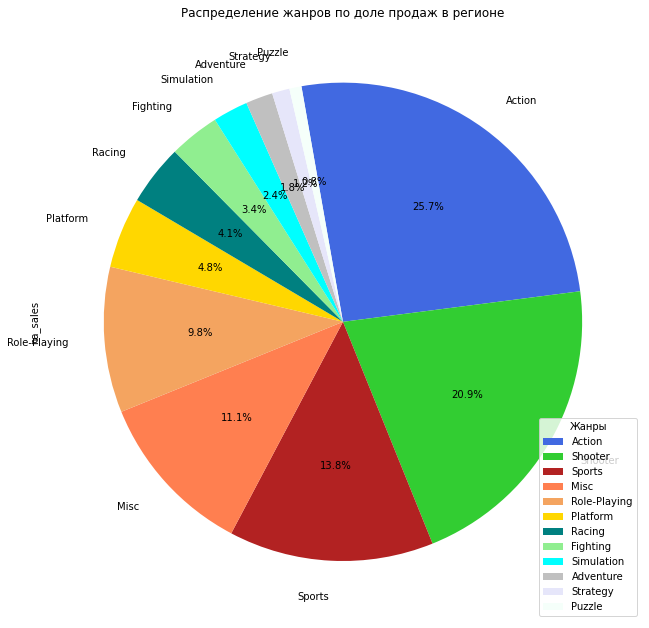


Топ-5 популярных консолей в регионе Северная Америка


,na_sales
platform,
X360,340.91
PS3,232.61
Wii,121.20
PS4,108.74
XOne,93.12


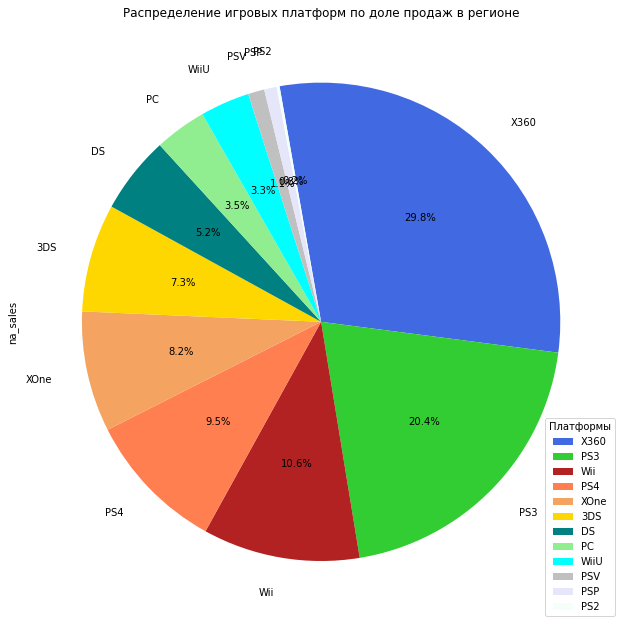


Продажи игр в зависимости от рейтинга в регионе Северная Америка


,na_sales
rating,
M,397.49
E,277.14
T,173.15
E10+,164.38
Not_rated,128.75


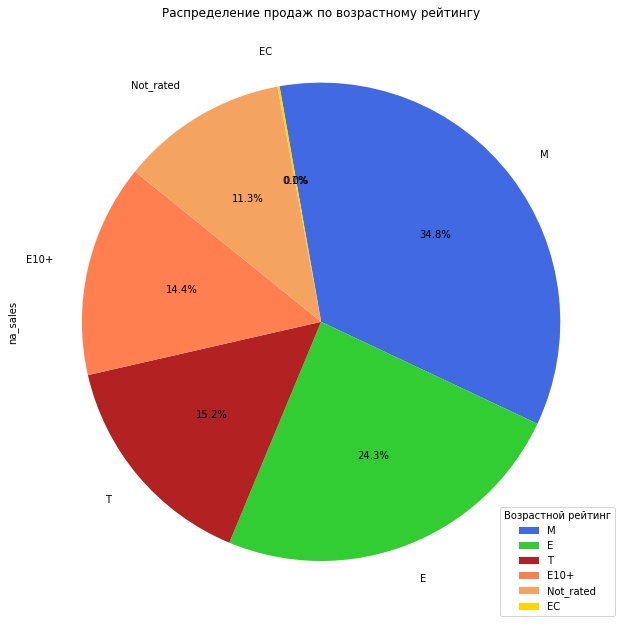

In [71]:
market_display(games_relevant, 'na_sales', 'Северная Америка')

Северная Америка характеризуется следующими особенностями:

- наиболее популярные жанры - action, shooter, sports
- наиболее популярные консоли - X360 и PS3
- больше всего продаются игры для взрослой аудитории, на втором месте - игры для всей семьи.

Рассмотрим особенности Японии и её отличия от Северной Америки.

Топ-5 популярных игр в регионе Япония


,jp_sales
name,
Pokemon Black/Pokemon White,5.65
Monster Hunter Freedom 3,4.87
Animal Crossing: New Leaf,4.39
Pokemon X/Pokemon Y,4.35
Monster Hunter 4,3.44



Топ-5 популярных жанров в регионе Япония


,jp_sales
genre,
Role-Playing,103.70
Action,72.84
Misc,24.30
Platform,15.81
Adventure,15.69


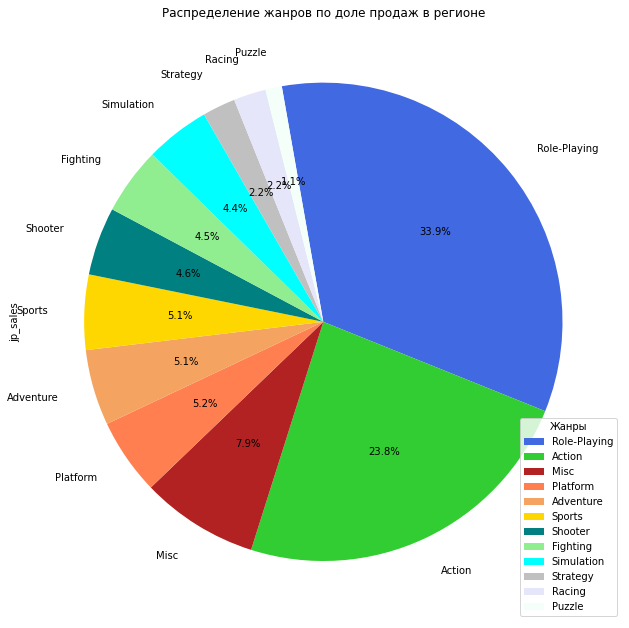


Топ-5 популярных консолей в регионе Япония


,jp_sales
platform,
3DS,100.67
PS3,60.04
PSP,42.20
DS,27.90
PSV,21.91


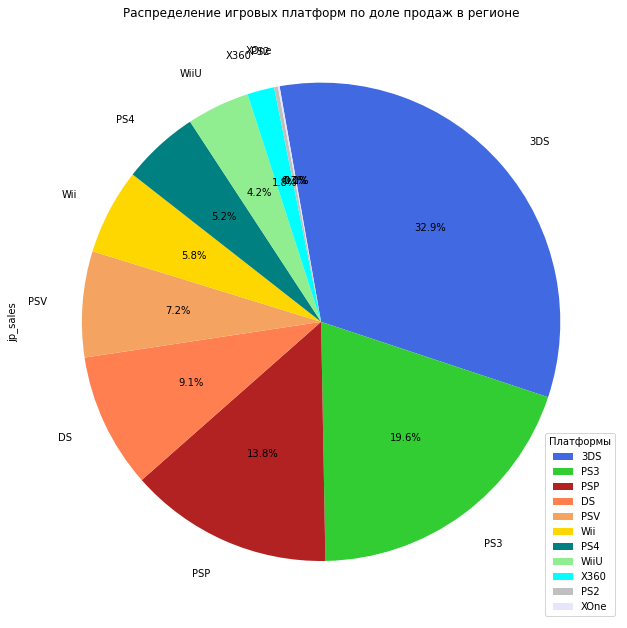


Продажи игр в зависимости от рейтинга в регионе Япония


,jp_sales
rating,
Not_rated,162.93
E,48.85
T,48.08
M,32.70
E10+,13.61


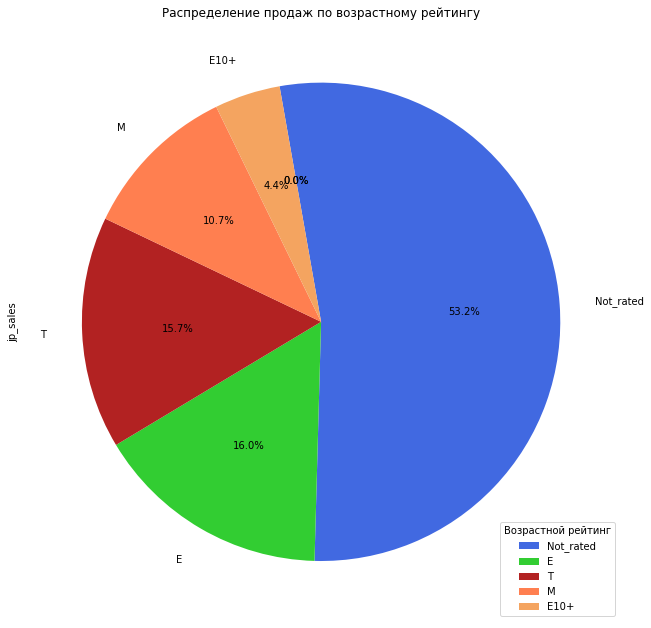

In [72]:
market_display(games_relevant, 'jp_sales', 'Япония')

Япония характеризуется следующими особенностями:

- в лидерах по продажам - игры серии Pokemon
- наиболее популярные жанры - rpg, action и игры прочих жанров
- японцы предпочитают консоли "своего" производителя - компаний Sony и Nintendo. Доля консолей компании Microsoft ничтожна
- большинство приобретаемых игр не имеет возрастного рейтинга

Мы видим, что Япония кардинально отличается от Северной Америки. Большую долю рынка занимают rpg, среди которых выделяется как серия Pokemon, так и иные j-rpg, выпускаемые исключительно для местного рынка (у данных игр отсутствует возрастной рейтинг, что означает, что данные игры могли быть недоступны на территории США).

Также любопытно практическое отсутствие в регионе консолей от Microsoft и распространённость портативной платформы 3DS (не в последнюю очередь это объясняется популярностью серии Pokemon).

Рассмотрим европейский регион.

Топ-5 популярных игр в регионе Европа


,eu_sales
name,
Grand Theft Auto V,23.42
FIFA 15,12.02
Call of Duty: Modern Warfare 3,11.15
FIFA 16,11.09
FIFA 14,10.96



Топ-5 популярных жанров в регионе Европа


,eu_sales
genre,
Action,236.60
Shooter,172.81
Sports,117.51
Role-Playing,75.65
Misc,66.92


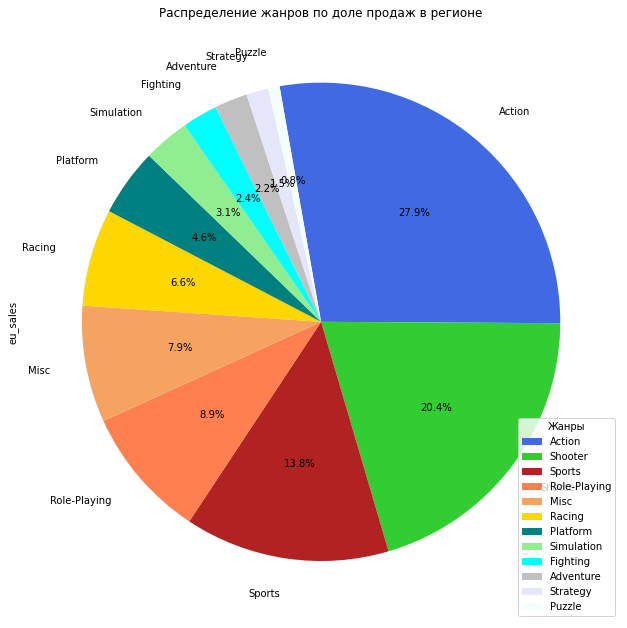


Топ-5 популярных консолей в регионе Европа


,eu_sales
platform,
PS3,216.68
X360,165.85
PS4,141.09
PC,70.79
Wii,65.91


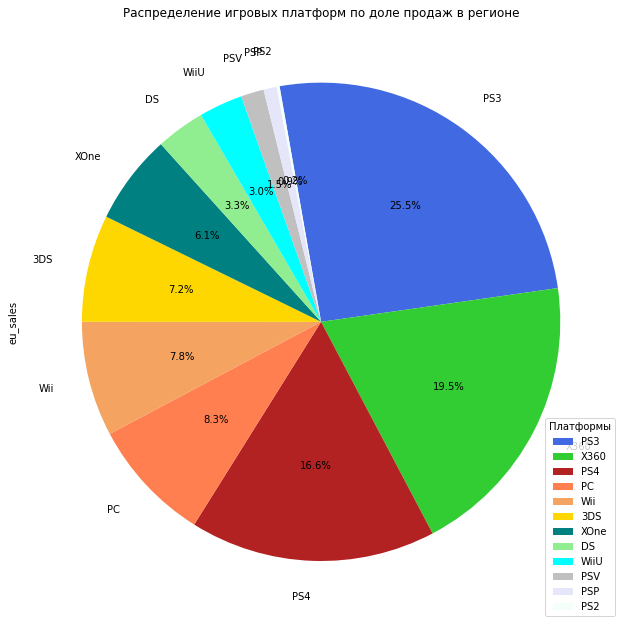


Продажи игр в зависимости от рейтинга в регионе Европа


,eu_sales
rating,
M,307.76
E,200.80
T,120.90
Not_rated,115.02
E10+,104.40


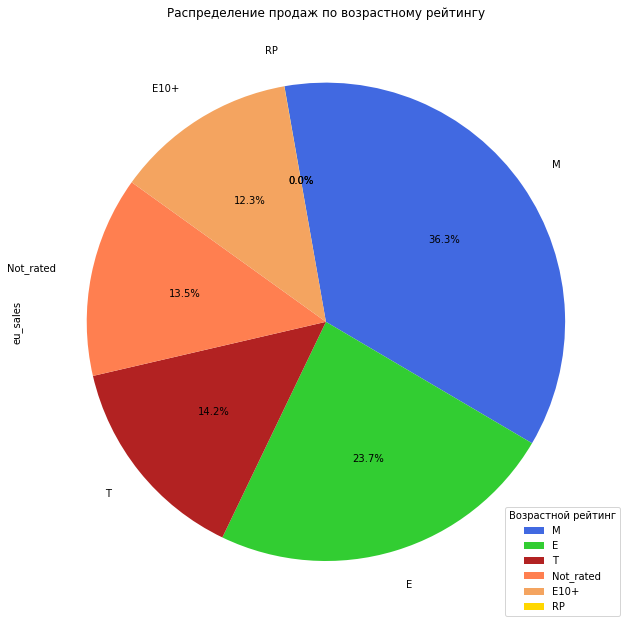

In [73]:
market_display(games_relevant, 'eu_sales', 'Европа')

Европа характеризуется следующими особенностями:

- наиболее популярные жанры схожи с Северной Америкой - action, shooter, sports. На 4е место однако уверенно выходит RPG.
- в популярных консолях, помимо X360, PS3, PS4 фигурирует PC, занимающий около 8% рынка
- портативные консоли не очень популярны
- пользователи, как и в США, обращают внимание на возрастной рейтинг и предпочитают игры для взрослой аудитории или для всей семьи


### Вывод <a id=info8> </a>

Мы рассмотрели 3 основных рынка - Северная Америка, Япония, Европа. Игроки в данных регионах характеризуются следующими чертами.

1) Северная Америка

- жанровые предпочтения - action,sports, shooter
- консольные предпочтения - X360, PS3, Nintendo Wii, PS4, XOne
- рейтинговые предпочтения - M и E

2) Япония

- жанровые предпочтения - rpg, action, platform
- консольные предпочтения - 3DS, PS3, PSP, DS
- рейтинговые предпочтения - игры без возрастного рейтинга (в целом рейтинг не важен)

3) Европа

- жанровые предпочтения - action,sports, shooter, rpg
- консольные предпочтения - X360, PS3, PS4, PC
- рейтинговые предпочтения - M и E

### 5. Проверка статистических гипотез <a id=info9> </a>

В рамках анализа рынка видеоигр проверим следующие гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2) Средние пользовательские рейтинги жанров Action и Sports разные.

**1)** Исследуем пользовательские рейтинги игр на XOne и PC. Данные платформы имеют схожую архитектуру, т.к. и консоль, и операционная система Windows являются разработкой компании Microsoft. В связи с этим набор выпускаемых игр получается схожим.

Сформулируем гипотезу H0: Средние пользовательские рейтинги на XOne и PC равны
Альтернативная гипотеза H1: Средние пользовательские рейтинги на данных платформах отличаются.

Мы оперируем не генеральной совокупностью, но выборкой из неё:
- доступны оценки не всех игр
- мы хотим оценить положение не только на ограниченном промежутке времени, но на всём сроке жизни консоли

Поскольку мы исследуем гипотезу о равенстве средних и количество наблюдений в выборках более 50, то для проверки достоверности гипотезы мы будем использовать t-тест - t-критерий Стьюдента. Уровень статистической значимости установим на значении 0.05.

Сформируем две выборки по платформе и оценкам и сравним их дисперсии.

In [74]:
#Создаём фреймы с оценками только на платформах pc и xone
xone_score = games_relevant[(games_relevant['platform'] == 'XOne')&(games_relevant['user_score'].isna() == False)]
pc_score = games_relevant[(games_relevant['platform'] == 'PC')&(games_relevant['user_score'].isna() == False)]
#вычисляем дисперсии
var_xone = np.var(xone_score['user_score'], ddof = 1)
var_pc = np.var(pc_score['user_score'], ddof = 1)
print('Дисперсия пользовательских оценок на Xbox One', var_xone)
print('Дисперсия пользовательских оценок на PC', var_pc)
#сравниваем, отличаются ли дисперсии более, чем на 5%
if var_xone/var_pc > 1.05 or var_pc/var_xone > 1.05:
    print('Дисперсии существенно отличаются')
else:
    print('Нет существенных различий между дисперсиями')


Дисперсия пользовательских оценок на Xbox One 1.899209173639067
Дисперсия пользовательских оценок на PC 2.4411059468682836
Дисперсии существенно отличаются


Так как дисперсии существенно отличаются, установим параметр equal_var = False

In [75]:
test_result = st.ttest_ind(xone_score['user_score'], pc_score['user_score'], equal_var = False)
alpha = 0.05
if test_result.pvalue > alpha:
    print('p-value:', test_result.pvalue)
    print('Нет оснований, чтобы отвергнуть нулевую гипотезу')
if test_result.pvalue < alpha:
    print('p-value:', test_result.pvalue)
    print('Есть основания, чтобы отвергнуть нулевую гипотезу')

p-value: 0.48179926972892295
Нет оснований, чтобы отвергнуть нулевую гипотезу


Статистический тест показал, что нет оснований отвергнуть H0. Т.е. мы можем предположить, что пользовательские рейтинги на платформах PC и Xbpx One схожи.

**2)** Рассмотрим вторую гипотезу. Мы исследуем два популярных жанра action и sports.
Сформулируем нулевую гипотезу

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
H1: Средние пользовательские рейтинги жанров Action и Sports отличаются

Поскольку мы исследуем гипотезу о равенстве средних и количество наблюдений в выборках более 50, то для проверки достоверности гипотезы мы будем использовать t-тест - t-критерий Стьюдента. Уровень статистической значимости установим на значении 0.05.


In [76]:
#Создаём фреймы с оценками только по жанрам action и sports
action_score = games_relevant[(games_relevant['genre'] == 'Action')&(games_relevant['user_score'].isna() == False)]
sports_score = games_relevant[(games_relevant['genre'] == 'Sports')&(games_relevant['user_score'].isna() == False)]
#вычисляем дисперсии
var_action = np.var(action_score['user_score'], ddof = 1)
var_sports = np.var(sports_score['user_score'], ddof = 1)
print('Дисперсия пользовательских оценок по жанру Action', var_action)
print('Дисперсия пользовательских оценок по жанру Sports', var_sports)
#сравниваем, отличаются ли дисперсии более, чем на 5%
if var_action/var_sports > 1.05 or var_sports/var_action > 1.05:
    print('Дисперсии существенно отличаются')
else:
    print('Нет существенных различий между дисперсиями')


Дисперсия пользовательских оценок по жанру Action 1.8326051936871925
Дисперсия пользовательских оценок по жанру Sports 2.7377181173537792
Дисперсии существенно отличаются


In [77]:
test_result = st.ttest_ind(action_score['user_score'], sports_score['user_score'], equal_var = False)
alpha = 0.05
if test_result.pvalue > alpha:
    print('p-value:', test_result.pvalue)
    print('Нет оснований, чтобы отвергнуть нулевую гипотезу')
if test_result.pvalue < alpha:
    print('p-value:', test_result.pvalue)
    print('Есть основания, чтобы отвергнуть нулевую гипотезу')

p-value: 8.0327347611452085e-19
Есть основания, чтобы отвергнуть нулевую гипотезу


Статистический тест показал, что есть основания, чтобы отвергнуть нулевую гипотезу. Значит, можно предположить, что на генеральной совокупности средние пользовательские оценки игр жанров Action и Sports отличаются.

### Вывод <a id=info10> </a>

Мы исследовали 2 гипотезы и выявили следующее:
1) Есть основания предположить, что на генеральной совокупности средние пользовательские рейтинги на платформах PC и Xbox one являются схожими
2) Есть основания предположить, что на генеральной совокупности средние пользовательские рейтинги жанров Action и Sports отличаются

### Общий вывод <a id=info11> </a>

Мы исследовали мировой рынок видеоигр. В ходе анализа было выявлено следующее:

1. Средний срок жизни игровой платформы составил **6** лет
2. В настоящее время рынок находится в процессе смены лидирующих платформ: на смену **X360** и **PS3** приходят **Xbox One** и **PS4**. **3DS**, лидирующая среди портативных консолей, начала входит в завершающую фазу жизненного цикла.
3. Наиболее популярными жанрами являются **Action, Shooter, Sports, Role-Playing**, наименее популярными - **Puzzle, Strategy, Adventure** (Однако на рынке PC стратегии занимают существенную долю в продажах)
4. При выборе игры, не относящейся к AAA-играм, потребители в довольно большой степени ориентируются на мнения критиков. Также мы видим, что большинство продаж игр находится на относительно низком уровне относительно "хитовых" тайтлов.
5. При формировании прогноза на следующий год необходимо учитывать региональную специфику:

**Япония**
- доминирование портативных консолей и консолей от Sony, практическое отсутствие на игровой сцене Xbox и PC
- существенный перевес жанра RPG и заметное присутствие жанра Platform на рынке за счет сверхпопулярных серий Pokemon и Mario
- при покупке игр пользователи практически не ориентируются на возрастной рейтинг

**Северная Америка**
- доминирование консолей X360, PS3, PS4, XOne, Wii
- доминирование жанров **Action, Shooter, Sports**
- в части возрастных ограничений выбираются либо игры для взрослой аудитории, либо для всей семьи

**Европа**
- бОльшая распространённость консолей от Sony, чем Xbox
- заметное присутствие PC на рынке
- доминирование жанров **Action, Shooter, Sports, RPG**
- в части возрастных ограничений выбираются либо игры для взрослой аудитории, либо для всей семьи
